In [1]:
import pyspark.sql as pyspark_sql
import pyspark.sql.functions as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [3]:
# SparkSession creation
spark = pyspark_sql.SparkSession.builder.appName("Data_Preprocessing").getOrCreate()

# Dividing Datasets according to the Location

### 1. col_mat_nuw_output.csv

In [4]:
# Read the data with setting column names
df1 = spark.read.csv("..\data\col_mat_nuw_output.csv", header=False, inferSchema=True)
df1 = df1.withColumnRenamed("_c0", "hcho_reading") \
    .withColumnRenamed("_c1", "location") \
    .withColumnRenamed("_c2", "current_date") \
    .withColumnRenamed("_c3", "next_date")

In [5]:
df1.printSchema()

root
 |-- hcho_reading: double (nullable = true)
 |-- location: string (nullable = true)
 |-- current_date: date (nullable = true)
 |-- next_date: date (nullable = true)



In [6]:
df1.show(truncate=False)

+---------------------+--------------+------------+----------+
|hcho_reading         |location      |current_date|next_date |
+---------------------+--------------+------------+----------+
|1.9698343957810148E-4|Colombo Proper|2019-01-01  |2019-01-02|
|2.6255221719685945E-4|Colombo Proper|2019-01-02  |2019-01-03|
|9.852118897938794E-5 |Colombo Proper|2019-01-03  |2019-01-04|
|2.099320518114242E-4 |Colombo Proper|2019-01-04  |2019-01-05|
|1.7853372988929305E-4|Colombo Proper|2019-01-05  |2019-01-06|
|1.0822967002356709E-4|Colombo Proper|2019-01-06  |2019-01-07|
|3.9268292804773094E-4|Colombo Proper|2019-01-07  |2019-01-08|
|9.153156350685351E-5 |Colombo Proper|2019-01-08  |2019-01-09|
|1.2059789928530154E-4|Colombo Proper|2019-01-09  |2019-01-10|
|1.2977235629832586E-4|Colombo Proper|2019-01-10  |2019-01-11|
|2.2391881668012785E-4|Colombo Proper|2019-01-11  |2019-01-12|
|1.5694180941787597E-4|Colombo Proper|2019-01-12  |2019-01-13|
|NULL                 |Colombo Proper|2019-01-13  |2019

In [7]:
# No of rows
print("No of rows: ", df1.count())

No of rows:  5478


In [8]:
# Convert Negative values to null values
df1 = df1.withColumn("hcho_reading", F.when(F.col("hcho_reading") < 0, None).otherwise(F.col("hcho_reading")))

In [9]:
# Number of null values in each column
df1.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df1.columns]).show()

+------------+--------+------------+---------+
|hcho_reading|location|current_date|next_date|
+------------+--------+------------+---------+
|        2682|       0|           0|        0|
+------------+--------+------------+---------+



In [10]:
# As a percentage get the number of null values in each column
df1.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df1.columns]) \
    .select([F.col(c) / df1.count() for c in df1.columns]).show()

+---------------------+-----------------+---------------------+------------------+
|(hcho_reading / 5478)|(location / 5478)|(current_date / 5478)|(next_date / 5478)|
+---------------------+-----------------+---------------------+------------------+
|   0.4895947426067908|              0.0|                  0.0|               0.0|
+---------------------+-----------------+---------------------+------------------+



In [11]:
# Group by location and get the count of each location
df1.groupBy("location").count().show()

+-------------------+-----+
|           location|count|
+-------------------+-----+
|   Deniyaya, Matara| 1826|
|     Colombo Proper| 1826|
|Nuwara Eliya Proper| 1826|
+-------------------+-----+



In [12]:
# Devide the dataset according to the location and save as dataframes
df_colombo = df1.filter(df1.location == "Colombo Proper").toPandas()
df_matara = df1.filter(df1.location == "Deniyaya, Matara").toPandas()
df_nuwara_eliya = df1.filter(df1.location == "Nuwara Eliya Proper").toPandas()

In [13]:
# Get the length of each dataframe
print("Colombo Proper:", len(df_colombo))
print("Deniyaya, Matara:", len(df_matara))
print("Nuwara Eliya Proper:", len(df_nuwara_eliya))

Colombo Proper: 1826
Deniyaya, Matara: 1826
Nuwara Eliya Proper: 1826


In [14]:
# Save the dataframes to csv files with dropping the location column
df_colombo.drop(columns=["location"]).to_csv(r"..\data\location\colombo_proper.csv", index=False)
df_matara.drop(columns=["location"]).to_csv(r"..\data\location\deniyaya_matara.csv", index=False)
df_nuwara_eliya.drop(columns=["location"]).to_csv(r"..\data\location\nuwaraeliya_proper.csv", index=False)

### 2. kan_output.csv

In [15]:
df2 = spark.read.csv("..\data\kan_output.csv", header=False, inferSchema=True)
df2 = df2.withColumnRenamed("_c0", "hcho_reading") \
    .withColumnRenamed("_c1", "location") \
    .withColumnRenamed("_c2", "current_date") \
    .withColumnRenamed("_c3", "next_date")

In [16]:
df2.printSchema()

root
 |-- hcho_reading: double (nullable = true)
 |-- location: string (nullable = true)
 |-- current_date: date (nullable = true)
 |-- next_date: date (nullable = true)



In [17]:
df2.show(truncate=False)

+----------------------+------------+------------+----------+
|hcho_reading          |location    |current_date|next_date |
+----------------------+------------+------------+----------+
|1.7607134598773356E-4 |Kandy Proper|2019-01-01  |2019-01-02|
|9.220391253917748E-5  |Kandy Proper|2019-01-02  |2019-01-03|
|NULL                  |Kandy Proper|2019-01-03  |2019-01-04|
|1.9086819838538396E-4 |Kandy Proper|2019-01-04  |2019-01-05|
|1.2195178402067448E-4 |Kandy Proper|2019-01-05  |2019-01-06|
|-6.514086129388805E-5 |Kandy Proper|2019-01-06  |2019-01-07|
|1.6323820639265E-4    |Kandy Proper|2019-01-07  |2019-01-08|
|-6.735205533914268E-5 |Kandy Proper|2019-01-08  |2019-01-09|
|1.2796936582431357E-4 |Kandy Proper|2019-01-09  |2019-01-10|
|4.546048424126012E-5  |Kandy Proper|2019-01-10  |2019-01-11|
|3.600074175192105E-5  |Kandy Proper|2019-01-11  |2019-01-12|
|1.286629698010177E-4  |Kandy Proper|2019-01-12  |2019-01-13|
|NULL                  |Kandy Proper|2019-01-13  |2019-01-14|
|NULL   

In [18]:
# No of rows
print("No of rows: ", df2.count())

No of rows:  1826


In [19]:
# Convert Negative values to null values
df2 = df2.withColumn("hcho_reading", F.when(F.col("hcho_reading") < 0, None).otherwise(F.col("hcho_reading")))

In [20]:
# Number of null values in each column
df2.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df2.columns]).show()

+------------+--------+------------+---------+
|hcho_reading|location|current_date|next_date|
+------------+--------+------------+---------+
|         901|       0|           0|        0|
+------------+--------+------------+---------+



In [21]:
# As a percentage get the number of null values in each column
df2.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df2.columns]) \
    .select([F.col(c) / df2.count() for c in df2.columns]).show()

+---------------------+-----------------+---------------------+------------------+
|(hcho_reading / 1826)|(location / 1826)|(current_date / 1826)|(next_date / 1826)|
+---------------------+-----------------+---------------------+------------------+
|  0.49342825848849947|              0.0|                  0.0|               0.0|
+---------------------+-----------------+---------------------+------------------+



In [22]:
# Get the distinct values in the location column
df2.select("location").distinct().show()

+------------+
|    location|
+------------+
|Kandy Proper|
+------------+



In [23]:
# Save to CSV file
df2.toPandas().drop(columns=["location"]).to_csv(r"..\data\location\kandy_proper.csv", index=False)

### 3. mon_kur_jaf_output.csv

In [24]:
df3 = spark.read.csv("..\data\mon_kur_jaf_output.csv", header=False, inferSchema=True)
df3 = df3.withColumnRenamed("_c0", "hcho_reading") \
    .withColumnRenamed("_c1", "location") \
    .withColumnRenamed("_c2", "current_date") \
    .withColumnRenamed("_c3", "next_date")

In [25]:
df3.printSchema()

root
 |-- hcho_reading: double (nullable = true)
 |-- location: string (nullable = true)
 |-- current_date: date (nullable = true)
 |-- next_date: date (nullable = true)



In [26]:
df3.show(truncate=False)

+----------------------+------------------+------------+----------+
|hcho_reading          |location          |current_date|next_date |
+----------------------+------------------+------------+----------+
|NULL                  |Bibile, Monaragala|2019-01-01  |2019-01-02|
|1.919914652467399E-5  |Bibile, Monaragala|2019-01-02  |2019-01-03|
|2.8114479359302837E-5 |Bibile, Monaragala|2019-01-03  |2019-01-04|
|3.747998184385943E-5  |Bibile, Monaragala|2019-01-04  |2019-01-05|
|-1.7982608793453114E-5|Bibile, Monaragala|2019-01-05  |2019-01-06|
|1.4578368961799026E-4 |Bibile, Monaragala|2019-01-06  |2019-01-07|
|2.8285908025465342E-5 |Bibile, Monaragala|2019-01-07  |2019-01-08|
|NULL                  |Bibile, Monaragala|2019-01-08  |2019-01-09|
|1.4208501670509577E-4 |Bibile, Monaragala|2019-01-09  |2019-01-10|
|NULL                  |Bibile, Monaragala|2019-01-10  |2019-01-11|
|2.014587947072581E-5  |Bibile, Monaragala|2019-01-11  |2019-01-12|
|1.5827876632101837E-4 |Bibile, Monaragala|2019-

In [27]:
# No of rows
print("No of rows: ", df3.count())

No of rows:  5478


In [28]:
# Convert Negative values to null values
df3 = df3.withColumn("hcho_reading", F.when(F.col("hcho_reading") < 0, None).otherwise(F.col("hcho_reading")))

In [29]:
# Number of null values in each column
df3.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df3.columns]).show()

+------------+--------+------------+---------+
|hcho_reading|location|current_date|next_date|
+------------+--------+------------+---------+
|        1844|       0|           0|        0|
+------------+--------+------------+---------+



In [30]:
# As a percentage get the number of null values in each column
df3.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df3.columns]) \
    .select([F.col(c) / df3.count() for c in df3.columns]).show()

+---------------------+-----------------+---------------------+------------------+
|(hcho_reading / 5478)|(location / 5478)|(current_date / 5478)|(next_date / 5478)|
+---------------------+-----------------+---------------------+------------------+
|  0.33661920408908363|              0.0|                  0.0|               0.0|
+---------------------+-----------------+---------------------+------------------+



In [31]:
# Group by location and get the count of each location
df3.groupBy("location").count().show()

+------------------+-----+
|          location|count|
+------------------+-----+
| Kurunegala Proper| 1826|
|Bibile, Monaragala| 1826|
|     Jaffna Proper| 1826|
+------------------+-----+



In [32]:
# Devide the dataset according to the location and save as dataframes
df_kurunegala = df3.filter(df3.location == "Kurunegala Proper").toPandas()
df_monaragala = df3.filter(df3.location == "Bibile, Monaragala").toPandas()
df_jaffna = df3.filter(df3.location == "Jaffna Proper").toPandas()

In [33]:
# Get the length of each dataframe
print("Kurunegala Proper:", len(df_kurunegala))
print("Bibile, Monaragala:", len(df_monaragala))
print("Jaffna Proper:", len(df_jaffna))

Kurunegala Proper: 1826
Bibile, Monaragala: 1826
Jaffna Proper: 1826


In [34]:
# Save the dataframes to csv files with dropping the location column
df_kurunegala.drop(columns=["location"]).to_csv(r"..\data\location\kurunegala_proper.csv", index=False)
df_monaragala.drop(columns=["location"]).to_csv(r"..\data\location\bibile_monaragala.csv", index=False)
df_jaffna.drop(columns=["location"]).to_csv(r"..\data\location\jaffna_proper.csv", index=False)

# Merge all dataframes into one

In [35]:
# Merge df1, df2 and df3
df = df1.union(df2).union(df3)

In [36]:
df.show(truncate=False)

+---------------------+--------------+------------+----------+
|hcho_reading         |location      |current_date|next_date |
+---------------------+--------------+------------+----------+
|1.9698343957810148E-4|Colombo Proper|2019-01-01  |2019-01-02|
|2.6255221719685945E-4|Colombo Proper|2019-01-02  |2019-01-03|
|9.852118897938794E-5 |Colombo Proper|2019-01-03  |2019-01-04|
|2.099320518114242E-4 |Colombo Proper|2019-01-04  |2019-01-05|
|1.7853372988929305E-4|Colombo Proper|2019-01-05  |2019-01-06|
|1.0822967002356709E-4|Colombo Proper|2019-01-06  |2019-01-07|
|3.9268292804773094E-4|Colombo Proper|2019-01-07  |2019-01-08|
|9.153156350685351E-5 |Colombo Proper|2019-01-08  |2019-01-09|
|1.2059789928530154E-4|Colombo Proper|2019-01-09  |2019-01-10|
|1.2977235629832586E-4|Colombo Proper|2019-01-10  |2019-01-11|
|2.2391881668012785E-4|Colombo Proper|2019-01-11  |2019-01-12|
|1.5694180941787597E-4|Colombo Proper|2019-01-12  |2019-01-13|
|NULL                 |Colombo Proper|2019-01-13  |2019

In [37]:
print("Entire Dataset Count:",df.count())

Entire Dataset Count: 12782


In [38]:
# Group by location and get the count of each location
df.groupBy("location").count().show()

+-------------------+-----+
|           location|count|
+-------------------+-----+
|   Deniyaya, Matara| 1826|
|     Colombo Proper| 1826|
|Nuwara Eliya Proper| 1826|
|       Kandy Proper| 1826|
|  Kurunegala Proper| 1826|
| Bibile, Monaragala| 1826|
|      Jaffna Proper| 1826|
+-------------------+-----+



In [39]:
# Save the merged dataframe to a csv file
df.toPandas().to_csv(r"..\data\all_data.csv", index=False)

### Handle Missing Values for each location and Handle Outliers

In [4]:
map = {"Kandy Proper": "kandy_proper.csv",
            "Colombo Proper": "colombo_proper.csv",
            "Deniyaya, Matara": "deniyaya_matara.csv",
            "Nuwara Eliya Proper": "nuwaraeliya_proper.csv",
            "Kurunegala Proper": "kurunegala_proper.csv",
            "Bibile, Monaragala": "bibile_monaragala.csv",
            "Jaffna Proper": "jaffna_proper.csv"}

In [5]:
def get_dataframe(location):
    global map
    
    df = spark.read.csv(r"../data/location/" + map[location], header=True, inferSchema=True)\
        .select("current_date", "hcho_reading").toPandas()
    
    # Convert the current_date column to datetime
    df["current_date"] = pd.to_datetime(df["current_date"])

    # Set date as the index
    df.set_index("current_date", inplace=True, drop=True)

    return df

In [6]:
# function to replace the null values with nearest interpolation, backfill and forward fill techniques
def fill_missing_values(df):
    df = df.interpolate(method='nearest')
    df = df.bfill()
    df = df.ffill()
    
    return df

In [7]:
# function to handle the outliers using the z-score method and plot before and after boxplots
def handle_outliers(df, location):

    df_copy = df.copy(deep=True)

    threshold=2.25
    
    # Calculate the upper and lower limits
    upper_limit = np.mean(df_copy["hcho_reading"]) + threshold * np.std(df_copy["hcho_reading"])
    lower_limit = np.mean(df_copy["hcho_reading"]) - threshold * np.std(df_copy["hcho_reading"])

    # Cap the outliers with the upper and lower limits
    df_copy["hcho_reading"] = np.where(df_copy["hcho_reading"] > upper_limit, upper_limit, df_copy["hcho_reading"])
    df_copy["hcho_reading"] = np.where(df_copy["hcho_reading"] < lower_limit, lower_limit, df_copy["hcho_reading"])
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(location)
    axs[0].boxplot(df["hcho_reading"])
    axs[0].set_title("Before Outlier Handling")
    
    axs[1].boxplot(df_copy["hcho_reading"])
    axs[1].set_title("After Outlier Handling")
    
    return df_copy

In [8]:
def time_series_plot(original_df, filled_df, outlier_handled_df, location):
    fig, axs = plt.subplots(3, 1, figsize=(12, 20))
    fig.suptitle(location, y=0.95, fontsize=16)
    axs[0].plot(original_df.index, original_df["hcho_reading"])
    axs[0].set_title("Original Data", fontsize=14)
    axs[0].set_xlabel("Date", fontsize=12)
    axs[0].set_ylabel("HCHO Reading", fontsize=12)
    
    axs[1].plot(filled_df.index, filled_df["hcho_reading"])
    axs[1].set_title("Filled Missing Values", fontsize=14)
    axs[1].set_xlabel("Date", fontsize=12)
    axs[1].set_ylabel("HCHO Reading", fontsize=12)
    
    axs[2].plot(outlier_handled_df.index, outlier_handled_df["hcho_reading"])
    axs[2].set_title("Outlier Handled", fontsize=14)
    axs[2].set_xlabel("Date", fontsize=12)
    axs[2].set_ylabel("HCHO Reading", fontsize=12)

    plt.subplots_adjust(top=0.925, hspace=0.25)
    plt.show()

In [9]:
locations = map.keys()

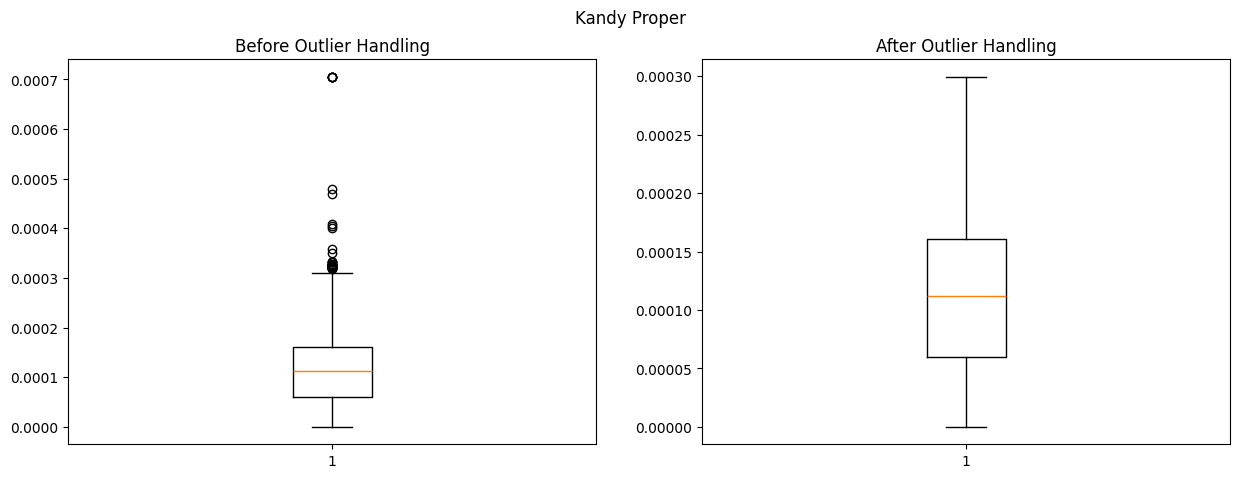

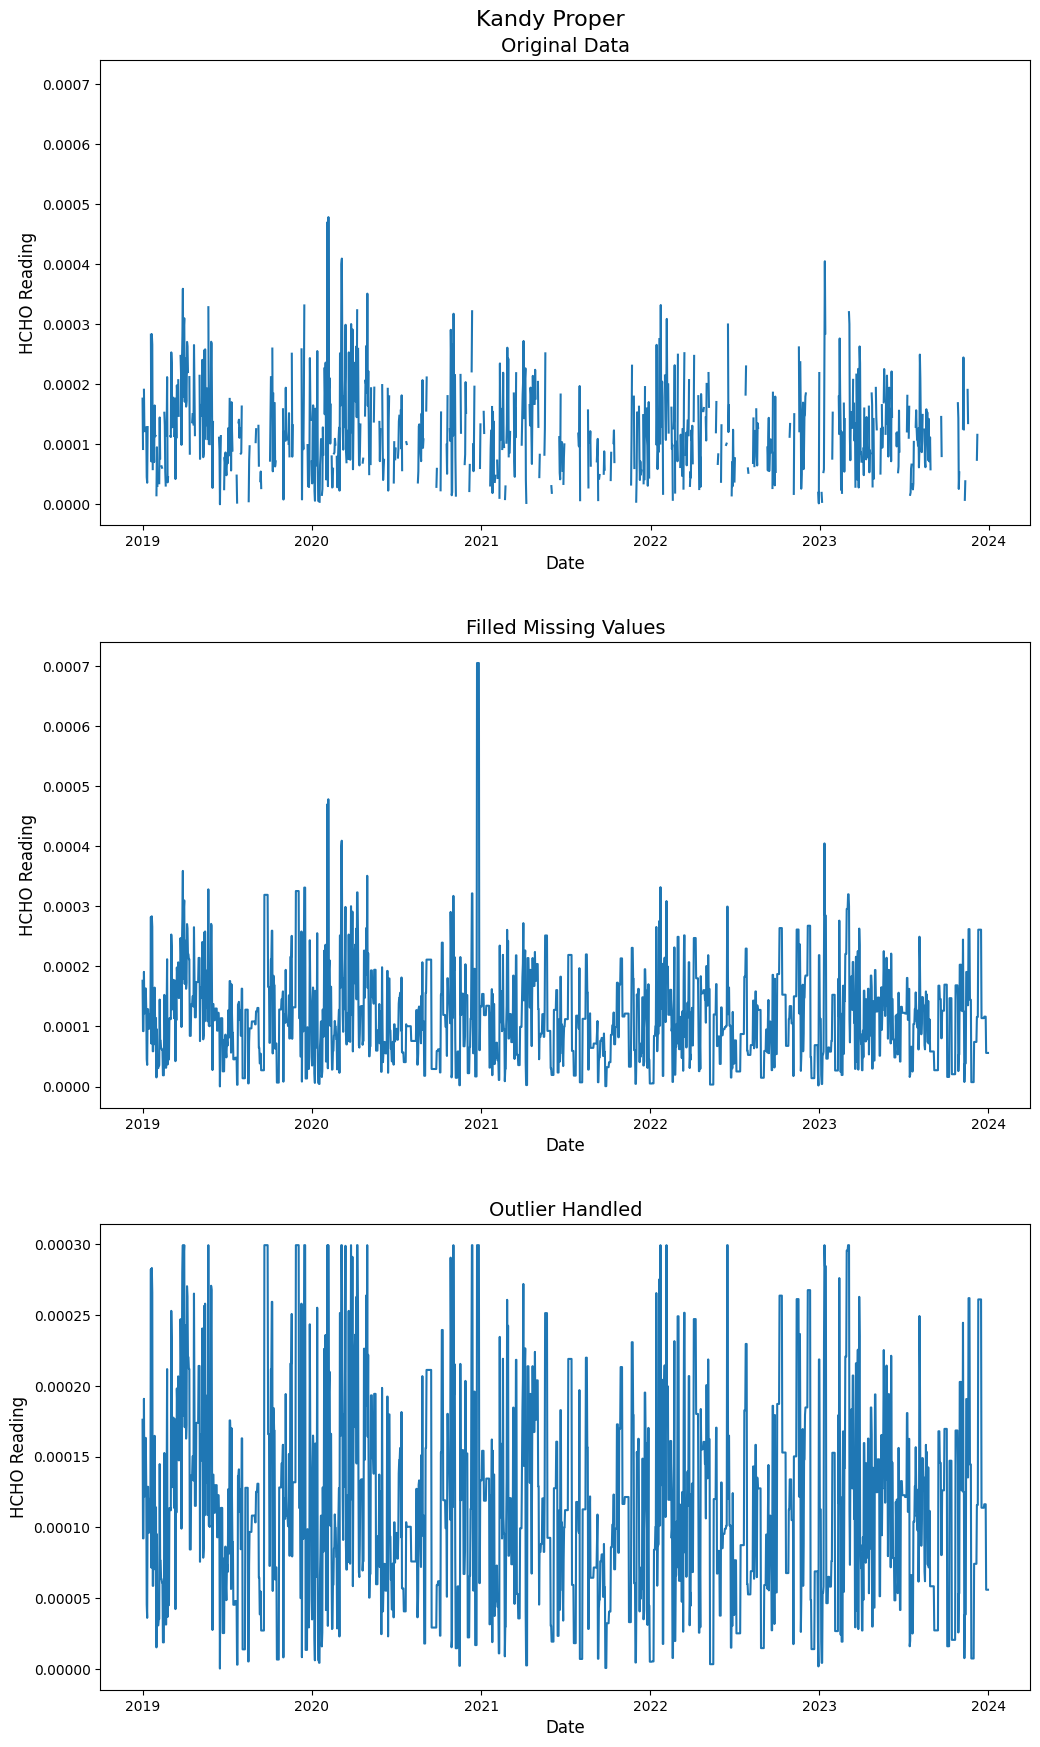

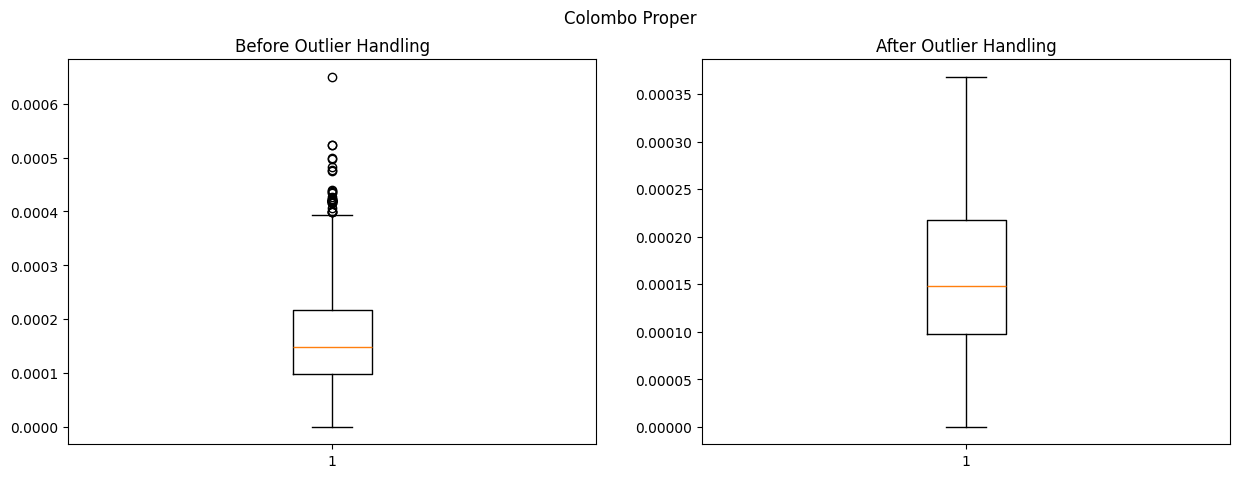

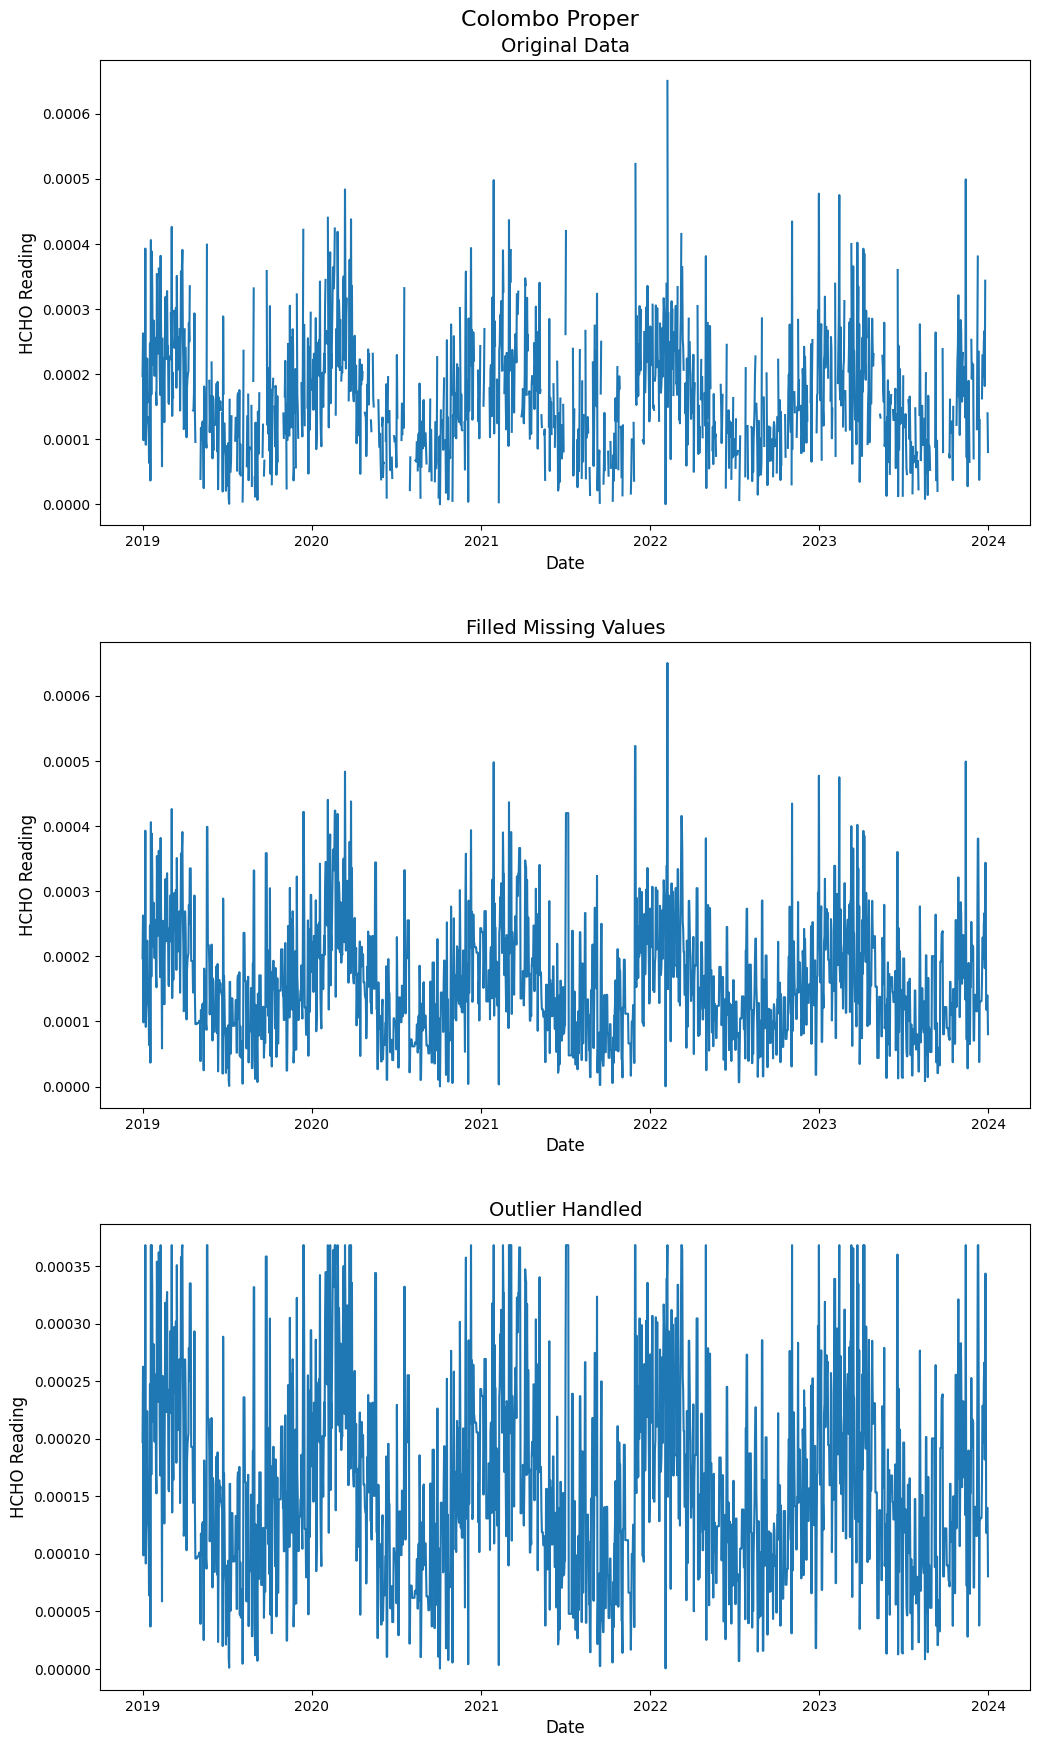

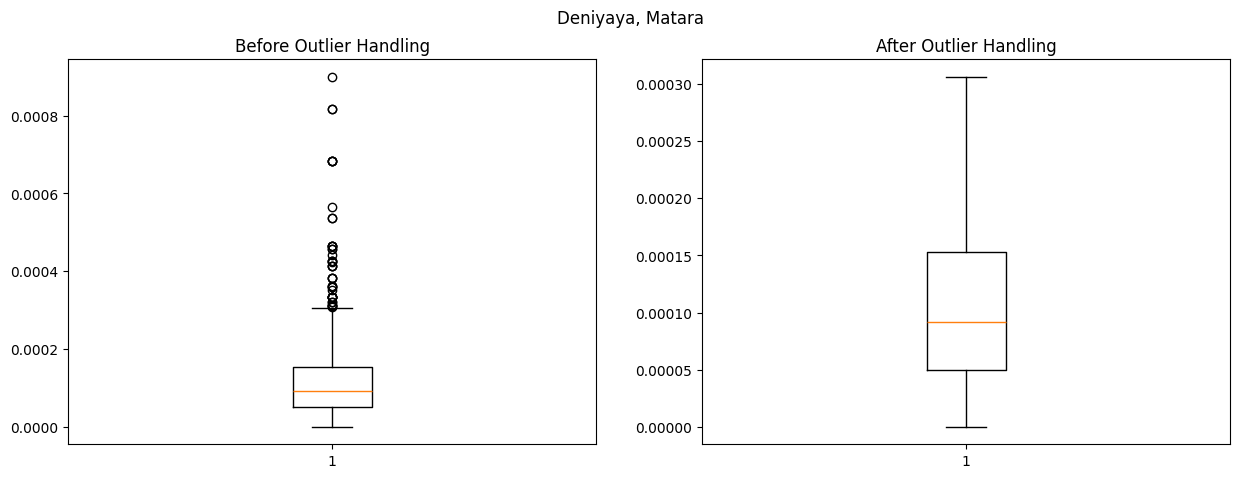

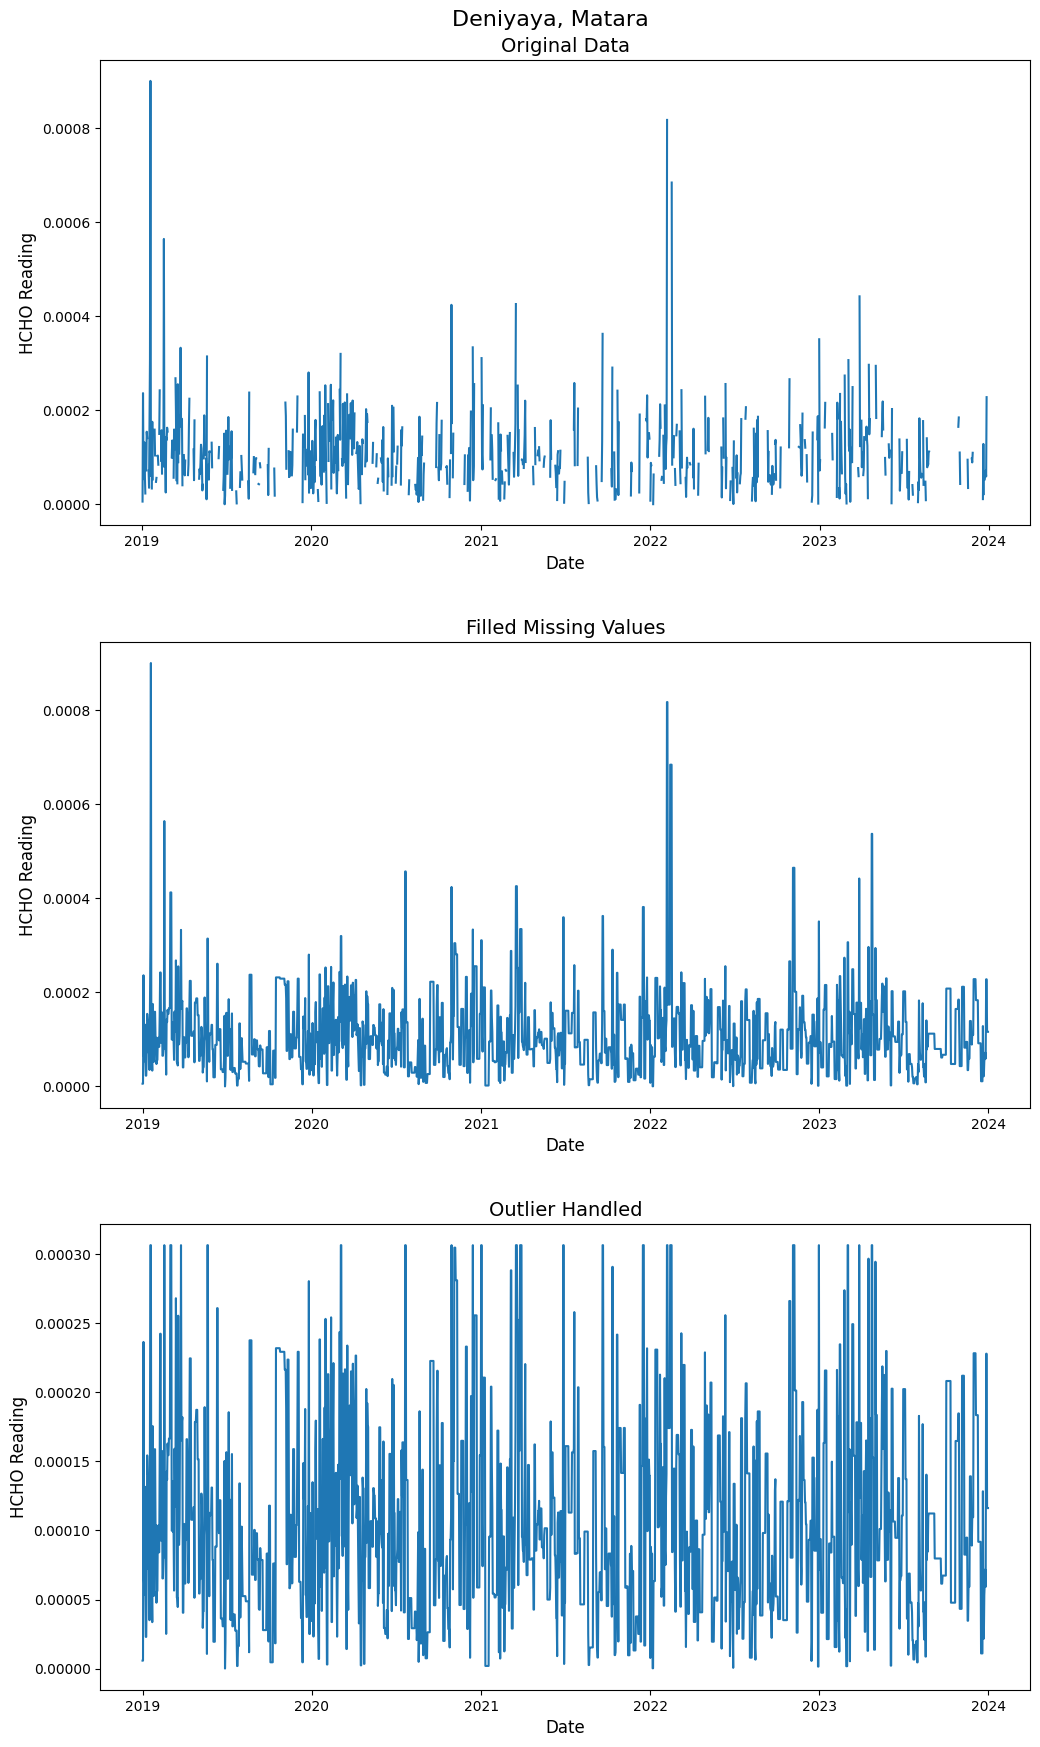

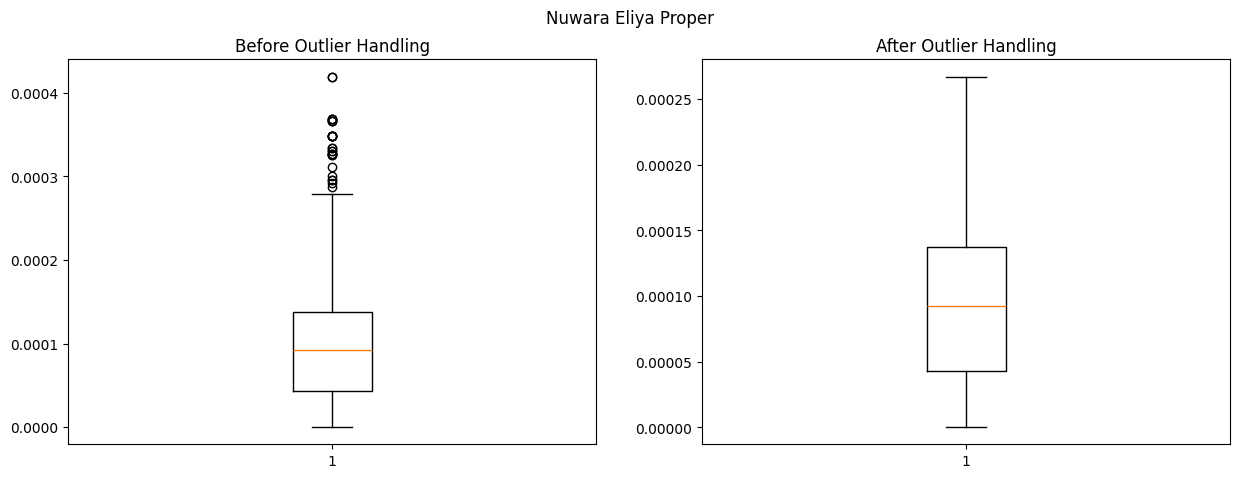

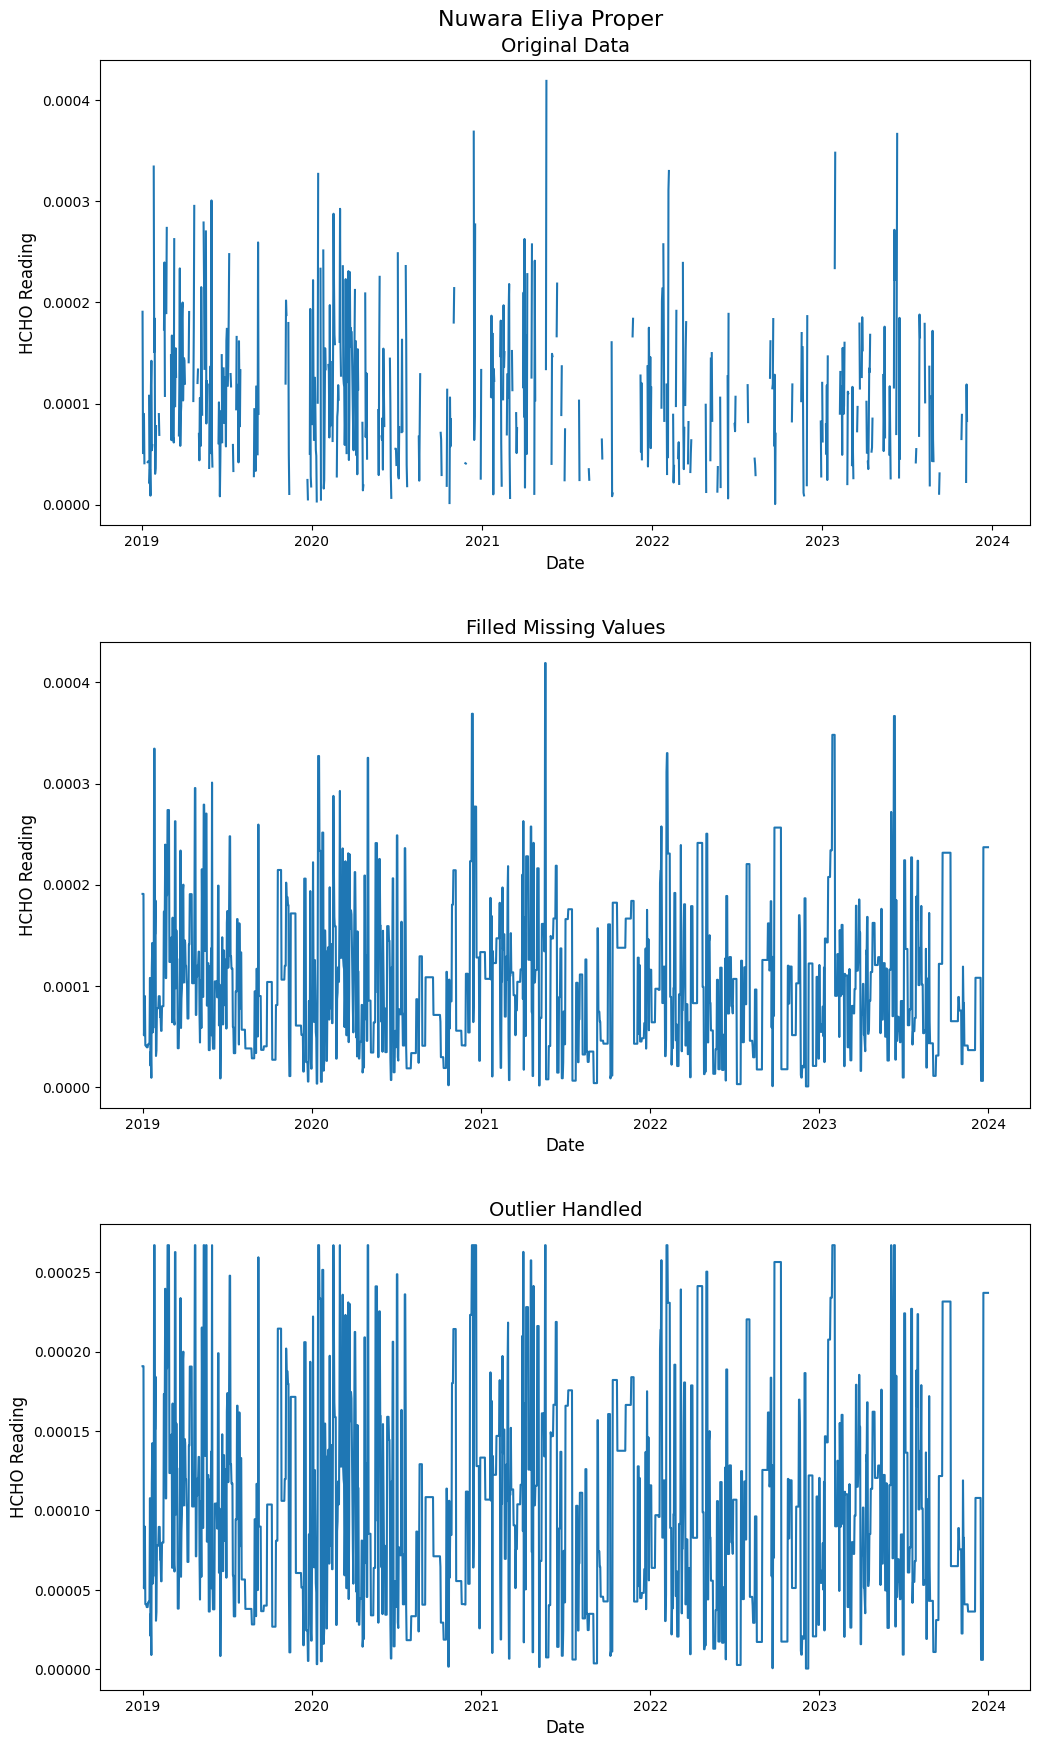

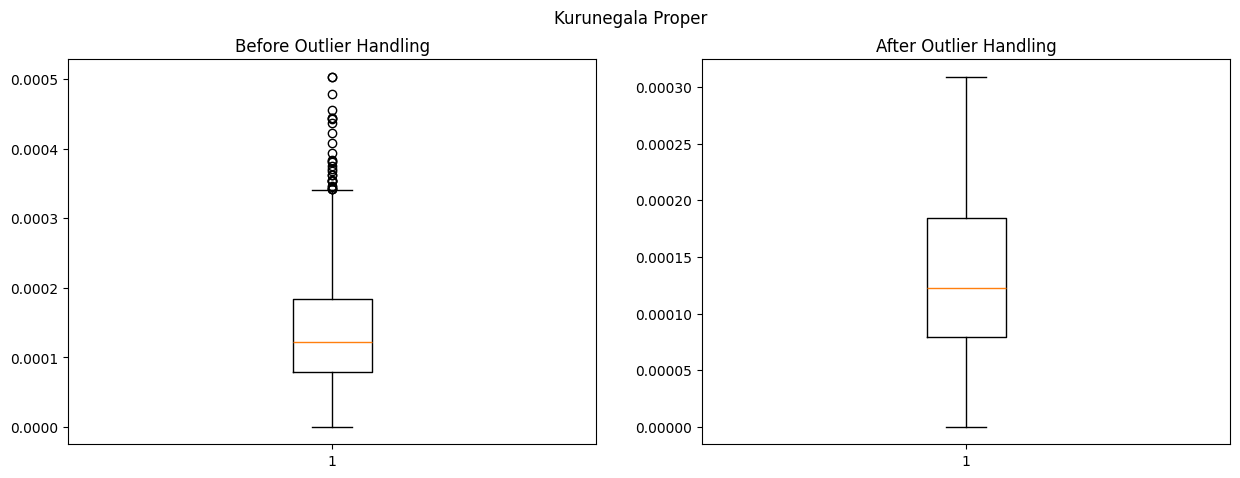

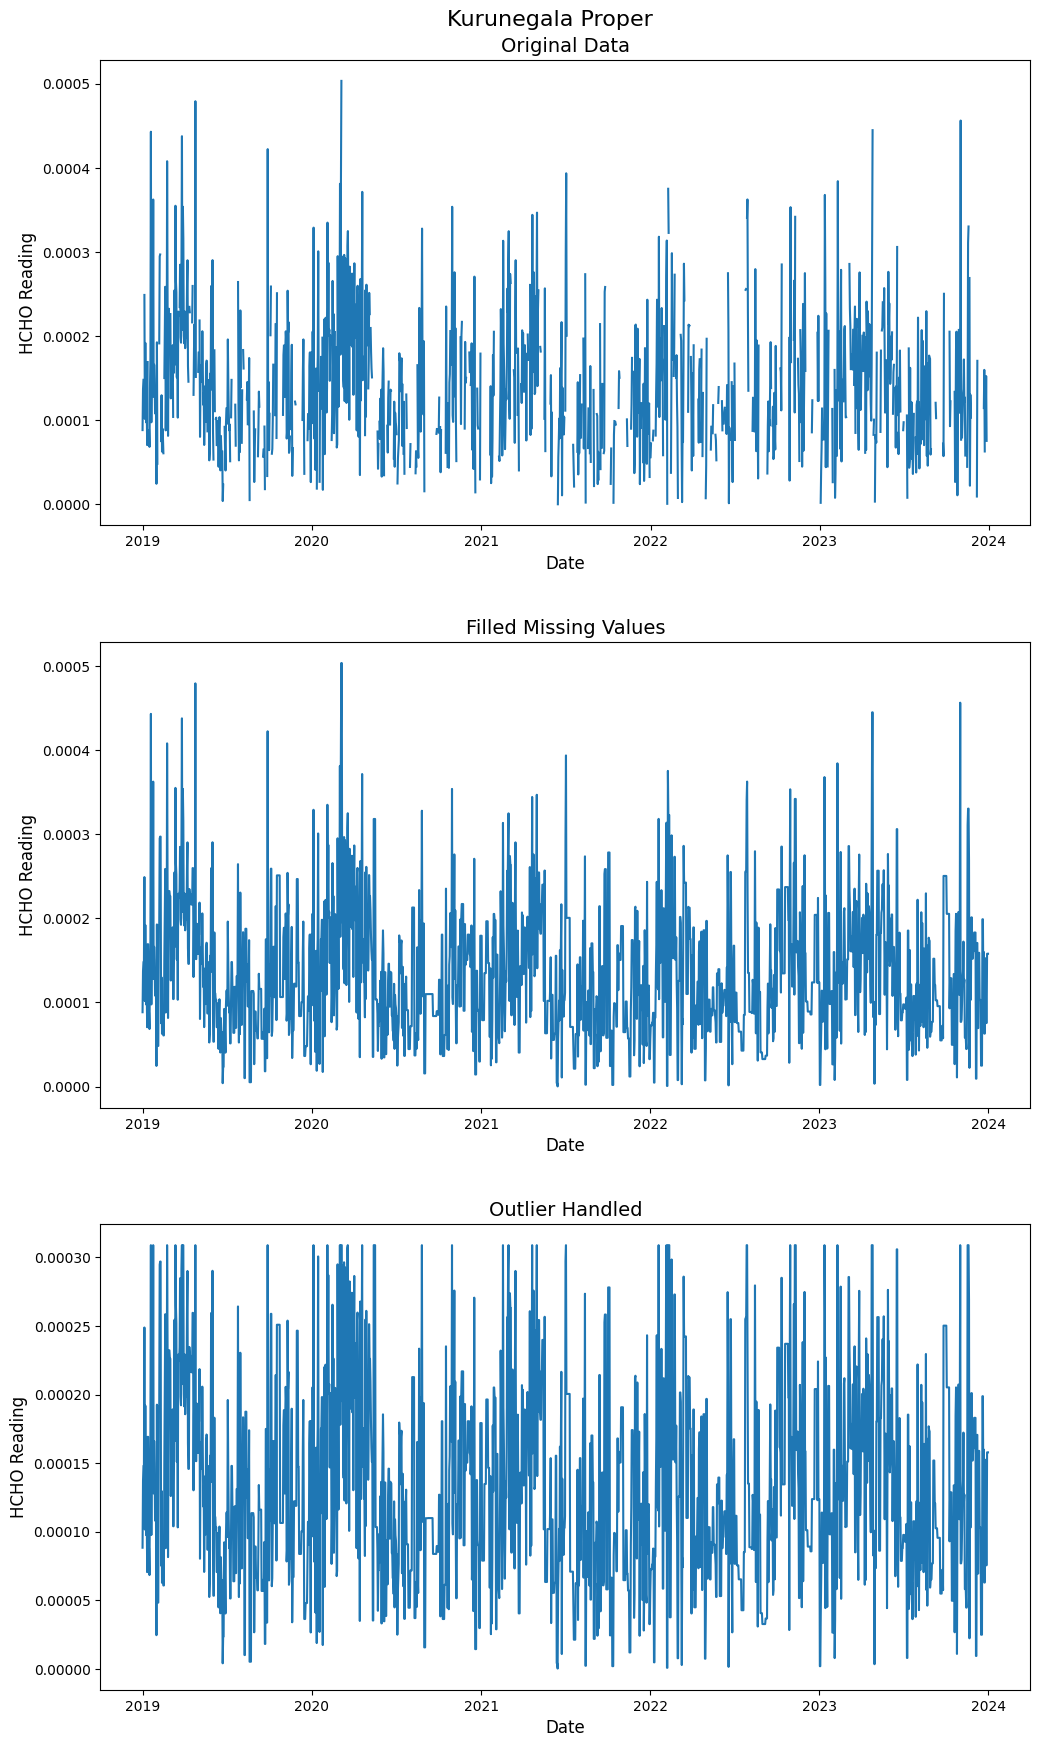

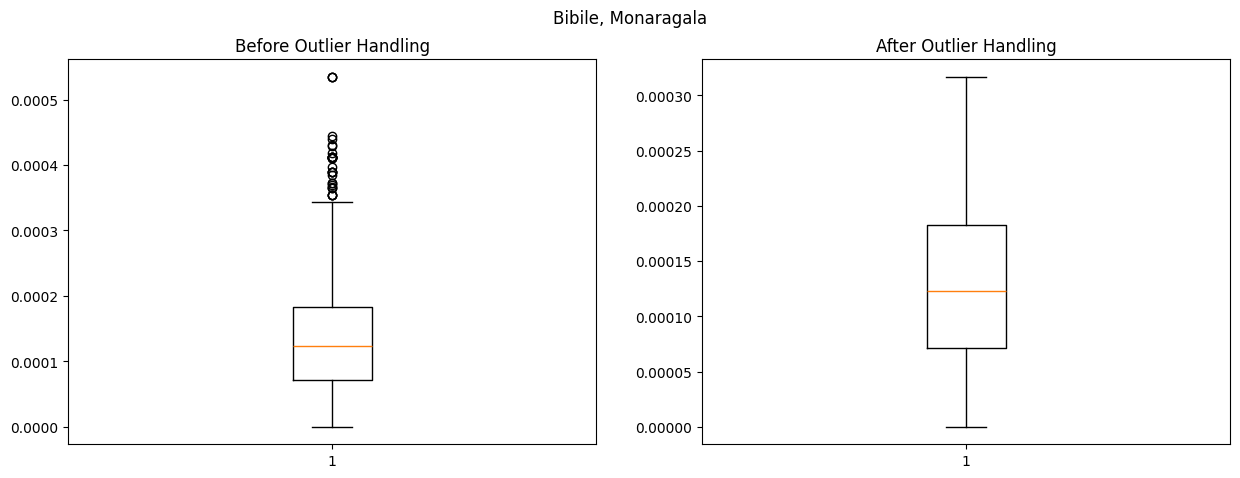

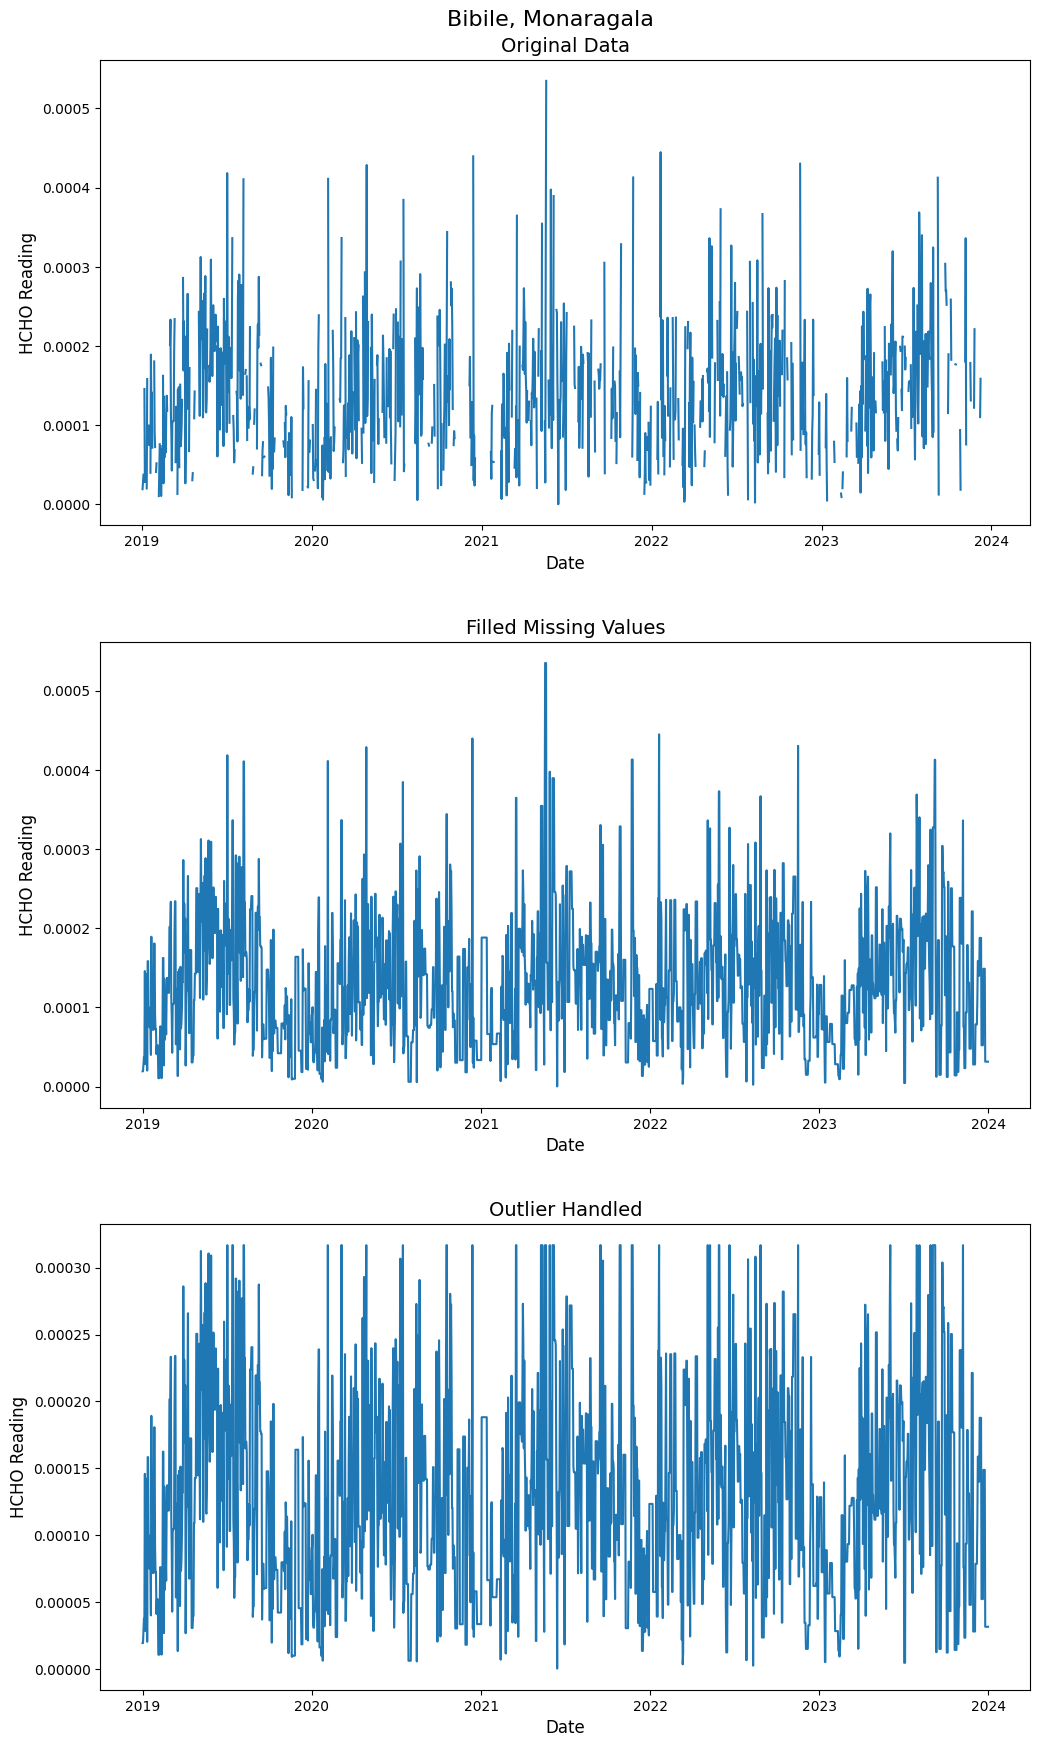

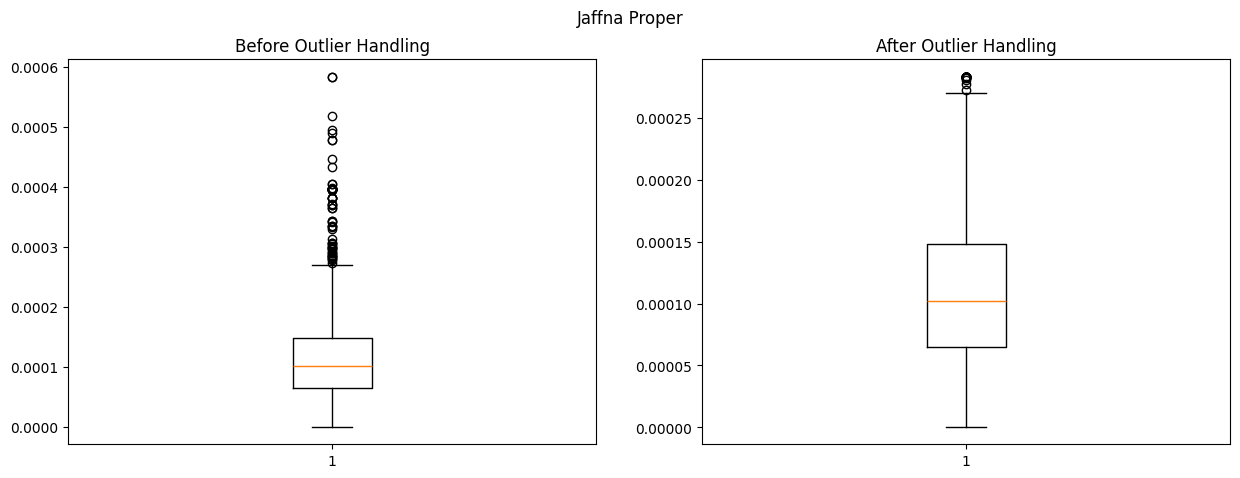

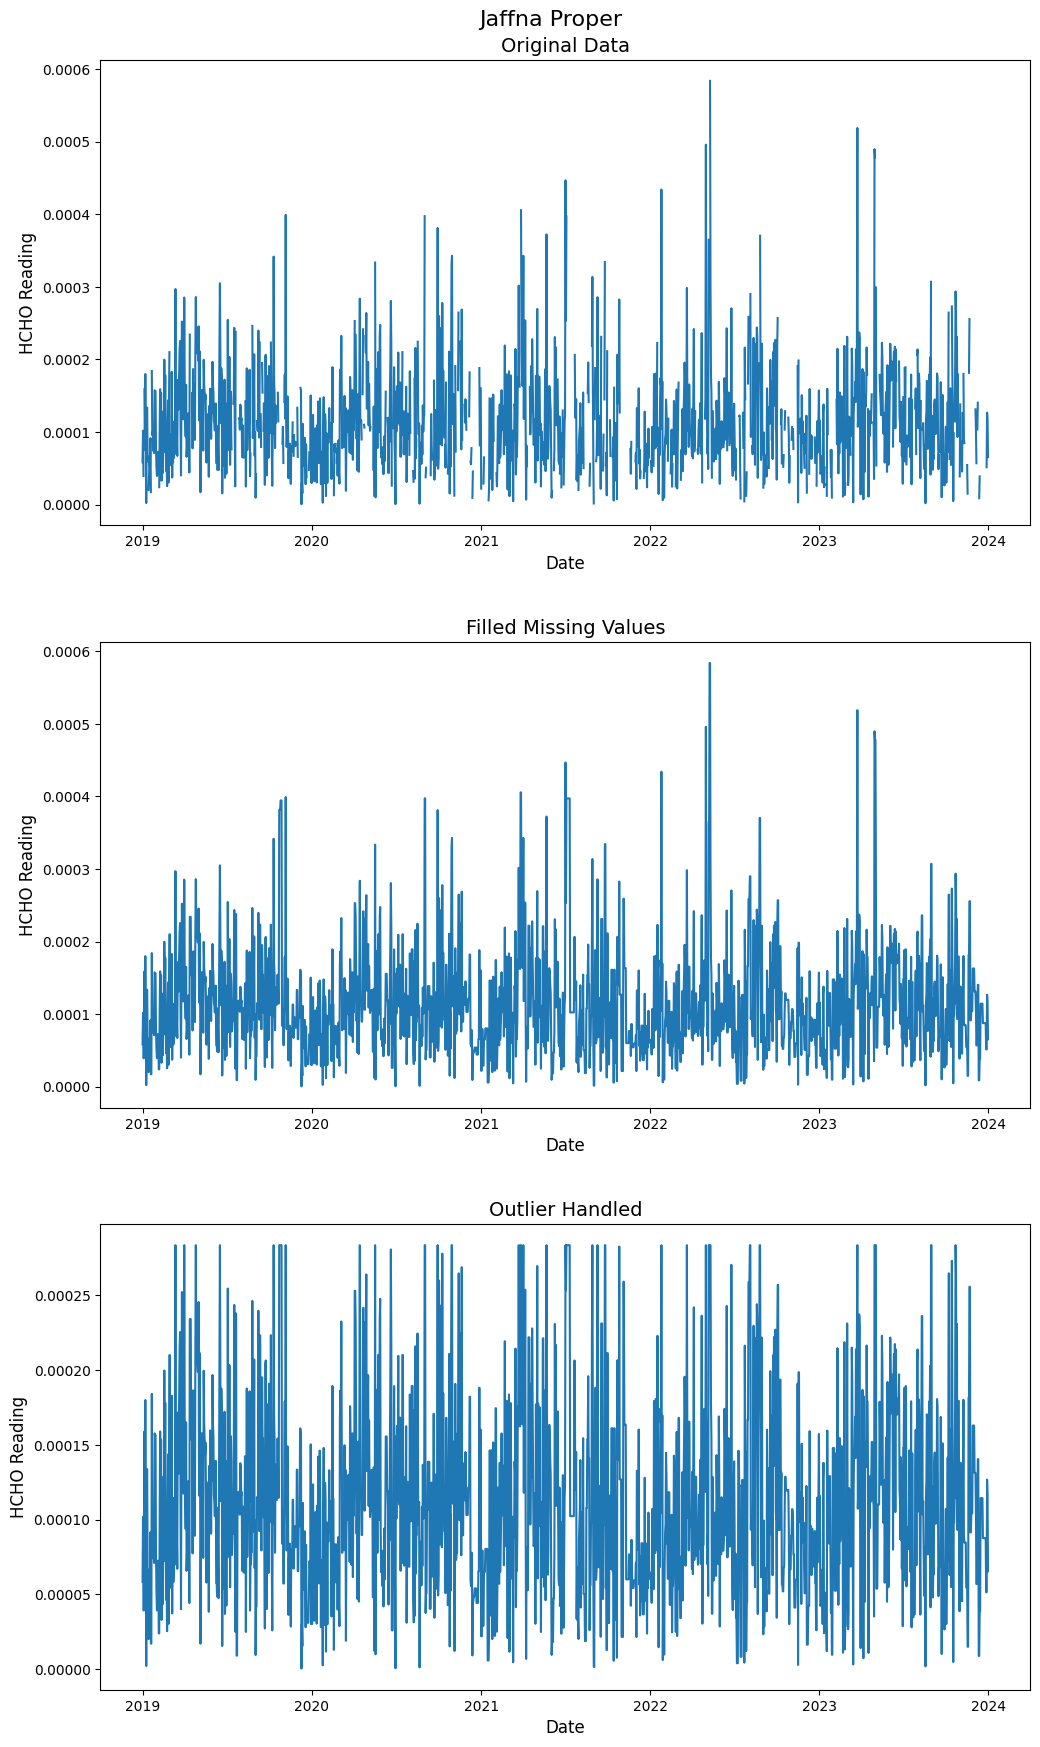

In [10]:
for location in locations:
    df = get_dataframe(location)
    fill_df = fill_missing_values(df)
    out_handled_df = handle_outliers(fill_df, location)
    time_series_plot(df, fill_df, out_handled_df, location)
    # Save the outlier handled dataframe to a csv file
    out_handled_df.to_csv(r"../data/processed/" + map[location], index=True)

In [11]:
# Combine all the processed dataframes with a location column
df = pd.concat([pd.read_csv(r"../data/processed/" + map[location]).assign(location=location) for location in locations])

# Save the combined dataframe to a csv file
df.to_csv(r"../data/processed/all_data.csv", index=False)

# External Factors Dataset

#### SriLanka_Weather_Dataset.csv

In [18]:
data = spark.read.csv(r"..\data\SriLanka_Weather_Dataset.csv", header=True, inferSchema=True)

In [19]:
data.printSchema()

root
 |-- time: date (nullable = true)
 |-- weathercode: integer (nullable = true)
 |-- temperature_2m_max: double (nullable = true)
 |-- temperature_2m_min: double (nullable = true)
 |-- temperature_2m_mean: double (nullable = true)
 |-- apparent_temperature_max: double (nullable = true)
 |-- apparent_temperature_min: double (nullable = true)
 |-- apparent_temperature_mean: double (nullable = true)
 |-- sunrise: timestamp (nullable = true)
 |-- sunset: timestamp (nullable = true)
 |-- shortwave_radiation_sum: double (nullable = true)
 |-- precipitation_sum: double (nullable = true)
 |-- rain_sum: double (nullable = true)
 |-- snowfall_sum: double (nullable = true)
 |-- precipitation_hours: double (nullable = true)
 |-- windspeed_10m_max: double (nullable = true)
 |-- windgusts_10m_max: double (nullable = true)
 |-- winddirection_10m_dominant: integer (nullable = true)
 |-- et0_fao_evapotranspiration: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: doub

In [20]:
# Remove data before 2019
data = data.filter(data["time"] >= "2019-01-01")

In [21]:
data.select("city").distinct().count()

30

In [22]:
data.select("city").distinct().show(30,truncate=False)

+-------------------------+
|city                     |
+-------------------------+
|Colombo                  |
|Maharagama               |
|Mount Lavinia            |
|Kesbewa                  |
|Moratuwa                 |
|Ratnapura                |
|Negombo                  |
|Sri Jayewardenepura Kotte|
|Kandy                    |
|Kalmunai                 |
|Trincomalee              |
|Matara                   |
|Athurugiriya             |
|Jaffna                   |
|Weligama                 |
|Galle                    |
|Gampaha                  |
|Kalutara                 |
|Puttalam                 |
|Kolonnawa                |
|Badulla                  |
|Pothuhera                |
|Matale                   |
|Mannar                   |
|Bentota                  |
|Kurunegala               |
|Hatton                   |
|Mabole                   |
|Hambantota               |
|Oruwala                  |
+-------------------------+



In [23]:
# Select only Colombo, Kandy, Kurunegala, Jaffna, Matara in cities
data = data.filter(data["city"].isin(["Colombo", "Kandy", "Kurunegala", "Jaffna", "Matara"]))

In [24]:
data.show(truncate=False)

+----------+-----------+------------------+------------------+-------------------+------------------------+------------------------+-------------------------+-------------------+-------------------+-----------------------+-----------------+--------+------------+-------------------+-----------------+-----------------+--------------------------+--------------------------+--------+---------+---------+---------+-------+
|time      |weathercode|temperature_2m_max|temperature_2m_min|temperature_2m_mean|apparent_temperature_max|apparent_temperature_min|apparent_temperature_mean|sunrise            |sunset             |shortwave_radiation_sum|precipitation_sum|rain_sum|snowfall_sum|precipitation_hours|windspeed_10m_max|windgusts_10m_max|winddirection_10m_dominant|et0_fao_evapotranspiration|latitude|longitude|elevation|country  |city   |
+----------+-----------+------------------+------------------+-------------------+------------------------+------------------------+-------------------------+--

In [25]:
data.select("snowfall_sum").distinct().show()

+------------+
|snowfall_sum|
+------------+
|         0.0|
+------------+



Since snowfall column have only 0 value that column can be dropped

In [26]:
data = data.drop("weathercode","sunrise","sunset","country","snowfall_sum","latitude",
                 "longitude","apparent_temperature_max","apparent_temperature_min","apparent_temperature_mean",
                 "winddirection_10m_dominant")

In [27]:
data.printSchema()

root
 |-- time: date (nullable = true)
 |-- temperature_2m_max: double (nullable = true)
 |-- temperature_2m_min: double (nullable = true)
 |-- temperature_2m_mean: double (nullable = true)
 |-- shortwave_radiation_sum: double (nullable = true)
 |-- precipitation_sum: double (nullable = true)
 |-- rain_sum: double (nullable = true)
 |-- precipitation_hours: double (nullable = true)
 |-- windspeed_10m_max: double (nullable = true)
 |-- windgusts_10m_max: double (nullable = true)
 |-- et0_fao_evapotranspiration: double (nullable = true)
 |-- elevation: double (nullable = true)
 |-- city: string (nullable = true)



In [28]:
data.select("city").distinct().show()

+----------+
|      city|
+----------+
|   Colombo|
|     Kandy|
|    Matara|
|    Jaffna|
|Kurunegala|
+----------+



In [29]:
# Change city names
data = data.withColumn("city", F.when(F.col("city") == "Colombo", "Colombo Proper") \
                       .when(F.col("city") == "Kandy", "Kandy Proper") \
                       .when(F.col("city") == "Kurunegala", "Kurunegala Proper") \
                       .when(F.col("city") == "Jaffna", "Jaffna Proper") \
                       .when(F.col("city") == "Matara", "Deniyaya, Matara").otherwise(F.col("city")))

In [30]:
# group by city and get the count of each city
data.groupBy("city").count().show()

+-----------------+-----+
|             city|count|
+-----------------+-----+
|   Colombo Proper| 1629|
|     Kandy Proper| 1629|
| Deniyaya, Matara| 1629|
|    Jaffna Proper| 1629|
|Kurunegala Proper| 1629|
+-----------------+-----+



In [31]:
# Check for null values
data.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in data.columns]).show()

+----+------------------+------------------+-------------------+-----------------------+-----------------+--------+-------------------+-----------------+-----------------+--------------------------+---------+----+
|time|temperature_2m_max|temperature_2m_min|temperature_2m_mean|shortwave_radiation_sum|precipitation_sum|rain_sum|precipitation_hours|windspeed_10m_max|windgusts_10m_max|et0_fao_evapotranspiration|elevation|city|
+----+------------------+------------------+-------------------+-----------------------+-----------------+--------+-------------------+-----------------+-----------------+--------------------------+---------+----+
|   0|                 0|                 0|                  0|                      0|                0|       0|                  0|                0|                0|                         0|        0|   0|
+----+------------------+------------------+-------------------+-----------------------+-----------------+--------+-------------------+---------

In [32]:
data1 = data.drop("city","time")

In [33]:
# check negative values in data1 for each column
data1.select([F.count(F.when(F.col(c) < 0, c)).alias(c) for c in data1.columns]).show()

+------------------+------------------+-------------------+-----------------------+-----------------+--------+-------------------+-----------------+-----------------+--------------------------+---------+
|temperature_2m_max|temperature_2m_min|temperature_2m_mean|shortwave_radiation_sum|precipitation_sum|rain_sum|precipitation_hours|windspeed_10m_max|windgusts_10m_max|et0_fao_evapotranspiration|elevation|
+------------------+------------------+-------------------+-----------------------+-----------------+--------+-------------------+-----------------+-----------------+--------------------------+---------+
|                 0|                 0|                  0|                      0|                0|       0|                  0|                0|                0|                         0|        0|
+------------------+------------------+-------------------+-----------------------+-----------------+--------+-------------------+-----------------+-----------------+------------------

There are no null values or negative values in the dataset

##### Join two dataset

##### 1. Colombo

In [38]:
colombo_external = data.filter(data["city"] == "Colombo Proper")

In [39]:
colombo = spark.read.csv(r"../data/processed/colombo_proper.csv", header=True, inferSchema=True)

In [40]:
# Join colombo dataframe to colombo_external dataframe
colombo = colombo.join(colombo_external, colombo["current_date"] == colombo_external["time"], "inner")

In [41]:
colombo.count()

1629

In [42]:
colombo.show(truncate=False)

+------------+---------------------+----------+------------------+------------------+-------------------+-----------------------+-----------------+--------+-------------------+-----------------+-----------------+--------------------------+---------+--------------+
|current_date|hcho_reading         |time      |temperature_2m_max|temperature_2m_min|temperature_2m_mean|shortwave_radiation_sum|precipitation_sum|rain_sum|precipitation_hours|windspeed_10m_max|windgusts_10m_max|et0_fao_evapotranspiration|elevation|city          |
+------------+---------------------+----------+------------------+------------------+-------------------+-----------------------+-----------------+--------+-------------------+-----------------+-----------------+--------------------------+---------+--------------+
|2019-01-01  |1.9698343957810148E-4|2019-01-01|30.0              |23.1              |26.1               |19.77                  |0.0              |0.0     |0.0                |14.4             |29.9       

In [43]:
# check current_date and time columns are equal
colombo.select(F.count(F.when(F.col("current_date") == F.col("time"), F.col("current_date"))).alias("equal_count")).show()

+-----------+
|equal_count|
+-----------+
|       1629|
+-----------+



##### 2. Kandy

In [44]:
kandy_external = data.filter(data["city"] == "Kandy Proper")

kandy = spark.read.csv(r"../data/processed/kandy_proper.csv", header=True, inferSchema=True)

# Join kandy dataframe to kandy_external dataframe
kandy = kandy.join(kandy_external, kandy["current_date"] == kandy_external["time"], "inner")

kandy.count()

1629

In [45]:
kandy.show(truncate=False)

+------------+---------------------+----------+------------------+------------------+-------------------+-----------------------+-----------------+--------+-------------------+-----------------+-----------------+--------------------------+---------+------------+
|current_date|hcho_reading         |time      |temperature_2m_max|temperature_2m_min|temperature_2m_mean|shortwave_radiation_sum|precipitation_sum|rain_sum|precipitation_hours|windspeed_10m_max|windgusts_10m_max|et0_fao_evapotranspiration|elevation|city        |
+------------+---------------------+----------+------------------+------------------+-------------------+-----------------------+-----------------+--------+-------------------+-----------------+-----------------+--------------------------+---------+------------+
|2019-01-01  |1.7607134598773356E-4|2019-01-01|24.6              |19.5              |21.8               |16.17                  |0.0              |0.0     |0.0                |12.7             |32.8             

In [46]:
# check current_date and time columns are equal
kandy.select(F.count(F.when(F.col("current_date") == F.col("time"), F.col("current_date"))).alias("equal_count")).show()

+-----------+
|equal_count|
+-----------+
|       1629|
+-----------+



##### 5. Kurunegala

In [47]:
kurunegala_external = data.filter(data["city"] == "Kurunegala Proper")

kurunegala = spark.read.csv(r"../data/processed/kurunegala_proper.csv", header=True, inferSchema=True)

# Join kurunegala dataframe to kurunegala_external dataframe
kurunegala = kurunegala.join(kurunegala_external, kurunegala["current_date"] == kurunegala_external["time"], "inner")

kurunegala.count()

1629

In [48]:
kurunegala.show(truncate=False)

+------------+---------------------+----------+------------------+------------------+-------------------+-----------------------+-----------------+--------+-------------------+-----------------+-----------------+--------------------------+---------+-----------------+
|current_date|hcho_reading         |time      |temperature_2m_max|temperature_2m_min|temperature_2m_mean|shortwave_radiation_sum|precipitation_sum|rain_sum|precipitation_hours|windspeed_10m_max|windgusts_10m_max|et0_fao_evapotranspiration|elevation|city             |
+------------+---------------------+----------+------------------+------------------+-------------------+-----------------------+-----------------+--------+-------------------+-----------------+-----------------+--------------------------+---------+-----------------+
|2019-01-01  |8.829725542537962E-5 |2019-01-01|27.7              |21.7              |24.3               |17.27                  |0.0              |0.0     |0.0                |17.3             |41

In [49]:
# check current_date and time columns are equal
kurunegala.select(F.count(F.when(F.col("current_date") == F.col("time"), F.col("current_date"))).alias("equal_count")).show()

+-----------+
|equal_count|
+-----------+
|       1629|
+-----------+



##### 4. Matara

In [50]:
matara_external = data.filter(data["city"] == "Deniyaya, Matara")

matara = spark.read.csv(r"../data/processed/deniyaya_matara.csv", header=True, inferSchema=True)

# Join matara dataframe to matara_external dataframe
matara = matara.join(matara_external, matara["current_date"] == matara_external["time"], "inner")

matara.count()

1629

In [51]:
matara.show(truncate=False)

+------------+---------------------+----------+------------------+------------------+-------------------+-----------------------+-----------------+--------+-------------------+-----------------+-----------------+--------------------------+---------+----------------+
|current_date|hcho_reading         |time      |temperature_2m_max|temperature_2m_min|temperature_2m_mean|shortwave_radiation_sum|precipitation_sum|rain_sum|precipitation_hours|windspeed_10m_max|windgusts_10m_max|et0_fao_evapotranspiration|elevation|city            |
+------------+---------------------+----------+------------------+------------------+-------------------+-----------------------+-----------------+--------+-------------------+-----------------+-----------------+--------------------------+---------+----------------+
|2019-01-01  |5.803530712000793E-6 |2019-01-01|28.9              |23.5              |26.2               |21.04                  |0.4              |0.4     |2.0                |13.7             |22.3 

In [52]:
# check current_date and time columns are equal
matara.select(F.count(F.when(F.col("current_date") == F.col("time"), F.col("current_date"))).alias("equal_count")).show()

+-----------+
|equal_count|
+-----------+
|       1629|
+-----------+



##### 5. Jaffna

In [53]:
jaffna_external = data.filter(data["city"] == "Jaffna Proper")

jaffna = spark.read.csv(r"../data/processed/jaffna_proper.csv", header=True, inferSchema=True)

# Join jaffna dataframe to jaffna_external dataframe
jaffna = jaffna.join(jaffna_external, jaffna["current_date"] == jaffna_external["time"], "inner")

jaffna.count()

1629

In [54]:
jaffna.show(truncate=False)

+------------+---------------------+----------+------------------+------------------+-------------------+-----------------------+-----------------+--------+-------------------+-----------------+-----------------+--------------------------+---------+-------------+
|current_date|hcho_reading         |time      |temperature_2m_max|temperature_2m_min|temperature_2m_mean|shortwave_radiation_sum|precipitation_sum|rain_sum|precipitation_hours|windspeed_10m_max|windgusts_10m_max|et0_fao_evapotranspiration|elevation|city         |
+------------+---------------------+----------+------------------+------------------+-------------------+-----------------------+-----------------+--------+-------------------+-----------------+-----------------+--------------------------+---------+-------------+
|2019-01-01  |5.830909719406619E-5 |2019-01-01|25.9              |23.4              |24.7               |16.35                  |0.0              |0.0     |0.0                |28.8             |41.4          

In [55]:
# check current_date and time columns are equal
jaffna.select(F.count(F.when(F.col("current_date") == F.col("time"), F.col("current_date"))).alias("equal_count")).show()

+-----------+
|equal_count|
+-----------+
|       1629|
+-----------+



#### Merge all dataframes to one

In [56]:
# Merge all the dataframes
df = colombo.union(kandy).union(kurunegala).union(matara).union(jaffna)


In [57]:
df.count()/5

1629.0

In [58]:
df.printSchema()

root
 |-- current_date: date (nullable = true)
 |-- hcho_reading: double (nullable = true)
 |-- time: date (nullable = true)
 |-- temperature_2m_max: double (nullable = true)
 |-- temperature_2m_min: double (nullable = true)
 |-- temperature_2m_mean: double (nullable = true)
 |-- shortwave_radiation_sum: double (nullable = true)
 |-- precipitation_sum: double (nullable = true)
 |-- rain_sum: double (nullable = true)
 |-- precipitation_hours: double (nullable = true)
 |-- windspeed_10m_max: double (nullable = true)
 |-- windgusts_10m_max: double (nullable = true)
 |-- et0_fao_evapotranspiration: double (nullable = true)
 |-- elevation: double (nullable = true)
 |-- city: string (nullable = true)



In [64]:
# Change the column names
df = df.withColumnRenamed("temperature_2m_max", "temp_max")\
    .withColumnRenamed("temperature_2m_min", "temp_min")\
    .withColumnRenamed("temperature_2m_mean", "temp_mean")\
    .withColumnRenamed("windspeed_10m_max", "windspeed_max")\
    .withColumnRenamed("windgusts_10m_max", "windgusts_max")\
    .withColumnRenamed("city", "location")\
    .withColumnRenamed("et0_fao_evapotranspiration", "evapotranspiration")

In [65]:
df.printSchema()

root
 |-- current_date: date (nullable = true)
 |-- hcho_reading: double (nullable = true)
 |-- time: date (nullable = true)
 |-- temp_max: double (nullable = true)
 |-- temp_min: double (nullable = true)
 |-- temp_mean: double (nullable = true)
 |-- shortwave_radiation_sum: double (nullable = true)
 |-- precipitation_sum: double (nullable = true)
 |-- rain_sum: double (nullable = true)
 |-- precipitation_hours: double (nullable = true)
 |-- windspeed_max: double (nullable = true)
 |-- windgusts_max: double (nullable = true)
 |-- evapotranspiration: double (nullable = true)
 |-- elevation: double (nullable = true)
 |-- location: string (nullable = true)



In [66]:
df.drop("time","rain_sum").toPandas().to_csv(r"../data/external_factors.csv", index=False)

In [67]:
df.printSchema()

root
 |-- current_date: date (nullable = true)
 |-- hcho_reading: double (nullable = true)
 |-- time: date (nullable = true)
 |-- temp_max: double (nullable = true)
 |-- temp_min: double (nullable = true)
 |-- temp_mean: double (nullable = true)
 |-- shortwave_radiation_sum: double (nullable = true)
 |-- precipitation_sum: double (nullable = true)
 |-- rain_sum: double (nullable = true)
 |-- precipitation_hours: double (nullable = true)
 |-- windspeed_max: double (nullable = true)
 |-- windgusts_max: double (nullable = true)
 |-- evapotranspiration: double (nullable = true)
 |-- elevation: double (nullable = true)
 |-- location: string (nullable = true)

